# CAPSTONE PROJECT (SEPHORA)

# Overview

In [4]:
# importing necessary libraries

import pandas as pd
import numpy as np

# loading in products data

data = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\product_info.csv")
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

The verbose=True parameter in info() sets the level of verbosity. When verbose=True, it provides detailed information about the DataFrame, including the number of non-null values in each column, the total memory usage, and the data types. If verbose=False, it provides a summary of the DataFrame's structure without the detailed column information.

By setting verbose=True, you get a more comprehensive overview of the DataFrame's content, which can be useful for data exploration and analysis.

From this, we gather that the products dataset contains 27 columns and 8,494 rows of data. The columns vary in data types, and there is missing data within the dataframe.

For the datasets related to the reviews, it will be helpful to join them all into one dataframe, which we can do with the following:

In [5]:
# getting the files

import pandas as pd

t1 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_0_250.csv", low_memory=False)
t2 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_250_500.csv", low_memory=False)
t3 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_500_750.csv", low_memory=False)
t4 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_750_1000.csv", low_memory=False)
t5 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_1000_1500.csv", low_memory=False)
t6 = pd.read_csv(r"C:\Users\logeshwar\OneDrive\Documents\Sephora\reviews_1500_end.csv", low_memory=False)

# combining the dfs

texta = pd.concat([t1,t2,t3,t4,t5,t6])
texta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1301136 non-null  int64  
 1   author_id                 1301136 non-null  object 
 2   rating                    1301136 non-null  int64  
 3   is_recommended            1107162 non-null  float64
 4   helpfulness               631670 non-null   float64
 5   total_feedback_count      1301136 non-null  int64  
 6   total_neg_feedback_count  1301136 non-null  int64  
 7   total_pos_feedback_count  1301136 non-null  int64  
 8   submission_time           1301136 non-null  object 
 9   review_text               1299520 non-null  object 
 10  review_title              930754 non-null   object 
 11  skin_tone                 1103798 non-null  object 
 12  eye_color                 1057734 non-null  object 
 13  skin_type                 117

We gather that there are around 1.3 million reviews with varying amounts of missing data across 19 columns of the 6 datasets.

It can also be helpful to view the numeric and non-numeric columns of both dataframes. We can do so with the following:

Numeric Columns

In [6]:
numeric_cols = data.select_dtypes(include = ['number']).columns
print(numeric_cols)
print(f'{len(numeric_cols)} Numeric Columns in Products Dataset')

Index(['brand_id', 'loves_count', 'rating', 'reviews', 'price_usd',
       'value_price_usd', 'sale_price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')
15 Numeric Columns in Products Dataset




1. `numeric_cols = data.select_dtypes(include=['number']).columns`: This line selects columns from the DataFrame `data` that have numeric data types. The `select_dtypes()` method is used to filter columns based on their data types. In this case, `include=['number']` specifies that only columns with numeric data types should be selected. The `columns` attribute returns the column names of the selected columns. So, `numeric_cols` will be a list of column names that have numeric data.

2. `print(numeric_cols)`: This line prints the list of column names stored in `numeric_cols`. It displays the column names that contain numeric data from the DataFrame.

3. `print(f'{len(numeric_cols)} Numeric Columns in Products Dataset')`: This line prints the number of columns that contain numeric data. It uses an f-string (formatted string literal) to embed the length of `numeric_cols` into the printed message. The `len(numeric_cols)` returns the number of columns with numeric data, and it is included within curly braces `{}` in the f-string. The printed message will display the count of numeric columns in the products dataset.



In [7]:
numeric_cols_reviews = texta.select_dtypes(include = ['number']).columns
print(numeric_cols_reviews)
print(f'{len(numeric_cols_reviews)} Numeric Columns in Reviews Dataset')

Index(['Unnamed: 0', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'price_usd'],
      dtype='object')
8 Numeric Columns in Reviews Dataset


Non-Numeric Columns

In [8]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)
print(f'{len(non_numeric_cols)} Non-Numeric Columns in Products Dataset')

Index(['product_id', 'product_name', 'brand_name', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category'],
      dtype='object')
12 Non-Numeric Columns in Products Dataset


In [9]:
non_numeric_rev_cols = texta.select_dtypes(exclude=['number']).columns
print(non_numeric_rev_cols)
print(f'{len(non_numeric_rev_cols)} Non-Numeric Columns in Reviews Dataset')

Index(['author_id', 'submission_time', 'review_text', 'review_title',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name', 'brand_name'],
      dtype='object')
11 Non-Numeric Columns in Reviews Dataset


# DATA CLEANING 

Next, we need to clean the products dataset by performing the following tasks:

Assessing missing data and determining its extent.
Removing unnecessary data that is not relevant to our analysis.
Identifying and handling outliers, if present.
Reformatting the data if required.

Here we use the following code to see the amount of nulls by column within the dataset:

In [10]:
num_missing = data.isna().sum()
num_missing

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

This information would probably be more helpful in a percentage format, so we can easily assess whether columns with a high percentage of missing rows are necessary for the analysis.

In [11]:
pct_missing = data.isna().mean()
pct_missing

product_id            0.000000
product_name          0.000000
brand_id              0.000000
brand_name            0.000000
loves_count           0.000000
rating                0.032729
reviews               0.032729
size                  0.192018
variation_type        0.170002
variation_value       0.188133
variation_desc        0.852837
ingredients           0.111255
price_usd             0.000000
value_price_usd       0.946904
sale_price_usd        0.968213
limited_edition       0.000000
new                   0.000000
online_only           0.000000
out_of_stock          0.000000
sephora_exclusive     0.000000
highlights            0.259830
primary_category      0.000000
secondary_category    0.000942
tertiary_category     0.116553
child_count           0.000000
child_max_price       0.675771
child_min_price       0.675771
dtype: float64

data.isna() checks for missing values (NaN or null values) in the data DataFrame. It returns a DataFrame of the same shape as data with True values where missing values are present and False otherwise.

.mean() is then applied to the resulting DataFrame. This calculates the mean value for each column, where True is considered as 1 and False as 0. Since True represents the presence of a missing value, the mean will give the proportion of missing values in each column.

Finally, the calculated proportions of missing values are assigned to the variable pct_missing

<AxesSubplot:>

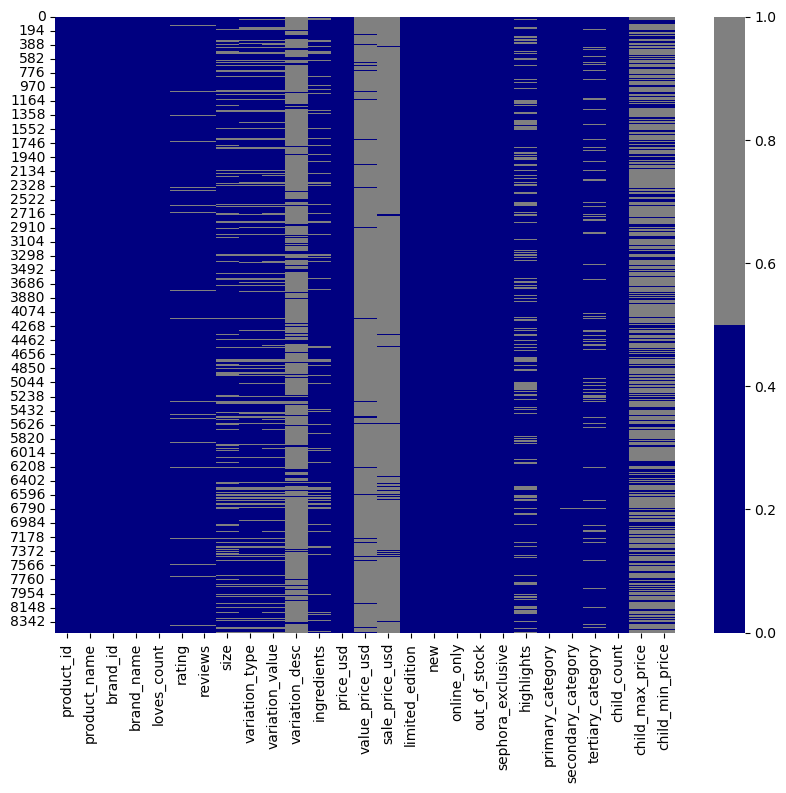

In [12]:
# heatmap to visualize missing data (products)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols= data.columns
colors=['navy','grey']
sns.heatmap(data[cols].isna(),cmap=sns.color_palette(colors))

From this, we can make note of the columns with a high percentage of missing data for when we assess which columns to remove from our dataset

We can do the same for the combined Reviews (texta) dataset.

<AxesSubplot:>

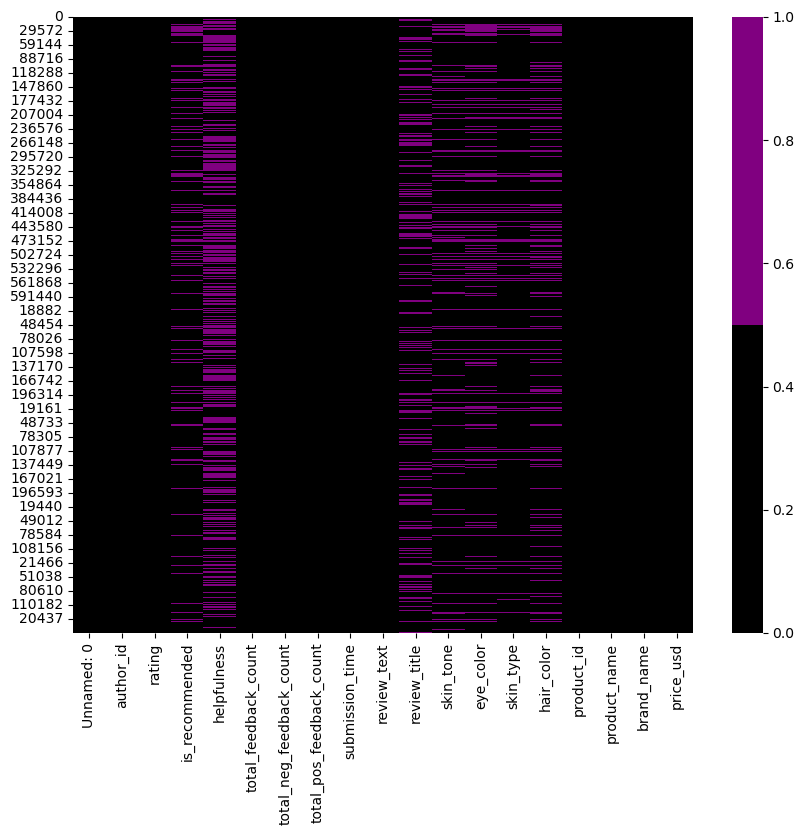

In [13]:
# heatmap to visualize missing data (reviews)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols= texta.columns
colors=['black','purple']
sns.heatmap(texta[cols].isna(),cmap=sns.color_palette(colors))

After completing the initial cleaning of our dataset, the next task is to identify and handle any outliers present in the data. Dealing with outliers at an early stage is crucial because they have the potential to significantly impact calculations and visualizations involving grouped data later on.

To detect outliers, we will utilize a statistical measure called kurtosis. Kurtosis measures the shape of the distribution of data points and indicates the presence of outliers in relation to the central tendency. Higher kurtosis values indicate a greater likelihood of outliers within the dataset.

In simpler terms, we will use kurtosis to assess how the data is spread out and whether there are any extreme values that deviate significantly from the majority. These outliers can have a substantial impact on our analysis, so it is important to identify and address them early in the data cleaning process.

In [14]:
data.kurt(numeric_only=True)

brand_id               1.093603
loves_count           81.970717
rating                 4.325185
reviews               92.016227
price_usd            175.725678
value_price_usd       11.359239
sale_price_usd        86.270657
limited_edition        9.309590
new                    9.030711
online_only           -0.154605
out_of_stock           8.654053
sephora_exclusive     -1.032784
child_count           59.022650
child_max_price       18.646198
child_min_price       17.375622
dtype: float64

.kurt() is a method in pandas that is used to calculate the kurtosis of the columns in a DataFrame.

 data.kurt(numeric_only=True) calculates the kurtosis of the numeric columns in the data dataset, which measures the presence of outliers or the shape of the data distribution.

When examining the Products dataset, we observe that the "price_usd" column, which represents prices in U.S. dollars, has a substantially higher kurtosis value compared to other numerical columns.

To investigate further, we can utilize the describe() method in Python, which provides a summary of statistical measures for the dataset.

By analyzing the output of the describe() method, we can determine whether there are any outliers present on the left (negative side) or right (positive side) of the distribution of the "price_usd" column.

Outliers on the left side of the distribution would suggest unusually low prices, while outliers on the right side would indicate unusually high prices.

This examination will help identify any extreme values in the "price_usd" column and allow us to assess their impact on the overall dataset.

In [15]:
data['price_usd'].describe()

count    8494.000000
mean       51.655595
std        53.669234
min         3.000000
25%        25.000000
50%        35.000000
75%        58.000000
max      1900.000000
Name: price_usd, dtype: float64

The "price_usd" column in the dataset has a maximum value of 1,900 USD, while a significant portion of the data falls between 25 USD and 58 USD.

To confirm our observations, we can create a boxplot visualization of the "price_usd" column to identify any potential outliers.

By visually examining the boxplot, we can determine if there are data points beyond the whiskers, indicating outliers.

This analysis will help us validate the presence of extreme values and guide our decision on handling the outlier(s).

<AxesSubplot:>

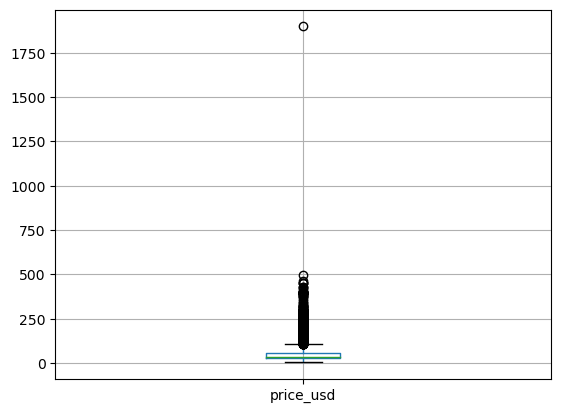

In [16]:
data.boxplot(column=['price_usd'])

In [17]:
data.loc[data['price_usd']==1900]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
6802,P502216,Shani Darden by Déesse PRO LED Light Mask,6314,Shani Darden Skin Care,4154,3.75,4.0,NaN,NaN,NaN,...,1,0,1,"['Good for: Loss of firmness', 'Good for: Anti...",Skincare,High Tech Tools,Anti-Aging,0,NaN,NaN


The code data.loc[data['price_usd']==1900] retrieves rows from the data DataFrame where the value in the 'price_usd' column is equal to 1900.

After doing some digging on Sephora's site, we can confirm that the price of the product above is legitimate. However, we will still exclude the outlier from the data to better gauge the price distribution later on.

We'll now check for the existence of outliers in the Reviews dataset.

In [18]:
texta.kurt(numeric_only=True)

Unnamed: 0                     -0.158336
rating                          1.743796
is_recommended                  1.422183
helpfulness                     0.625755
total_feedback_count         9392.851445
total_neg_feedback_count     5348.695138
total_pos_feedback_count    11959.954484
price_usd                      36.928923
dtype: float64

We notice that the columns related to the feedback counts have a high likelihood of outliers. Fortunately, these columns will not be used in the analyses of this project as they do not pertain to our business tasks.

Unnecessary Data

The next step in our data cleaning process involves assessing the necessity of each column in the dataframe for our specific business tasks. We will consider three factors: redundancy, relevancy, and completeness.

To identify redundancy, we will print out columns that have over 50% of their rows with the same value. This will help us identify largely repetitive columns that may not provide unique or useful information.

Additionally, we will print the most occurring values for each column to better understand their content and assess their relevance. This will allow us to gauge which columns provide valuable insights for our investigation.

Finally, we will also evaluate the completeness of the columns by checking for the presence of a significant number of NaNs or null values. Columns with too many missing values may not be usable for our analysis.

By considering redundancy, relevancy, and completeness, we can make informed decisions about which columns to retain and which ones to exclude from our analysis, ensuring that we are working with the most relevant and reliable data for our business tasks.

In [19]:
num_rows = len(data)

for col in data.columns:
    counts=data[col].value_counts(dropna=False)
    top_pct=(counts/num_rows).iloc[0]
    
    if top_pct > 0.50:
        print('{0}:{1:2f}%'.format(col,top_pct*100))
        print(counts)
        print()

variation_desc:85.283730%
NaN                       7244
black                       46
clear                       14
nude pink                   10
pink                         8
                          ... 
Vivid Fuchsia                1
pewter                       1
warm scarlet                 1
light medium to medium       1
cherry red                   1
Name: variation_desc, Length: 936, dtype: int64

value_price_usd:94.690370%
NaN      8043
40.0       15
48.0       12
45.0       10
36.0        9
         ... 
234.0       1
252.0       1
127.0       1
233.0       1
199.0       1
Name: value_price_usd, Length: 175, dtype: int64

sale_price_usd:96.821286%
NaN      8224
7.00       21
25.00      15
8.00       14
6.00       13
         ... 
56.25       1
39.50       1
33.60       1
13.50       1
27.30       1
Name: sale_price_usd, Length: 89, dtype: int64

limited_edition:92.971509%
0    7897
1     597
Name: limited_edition, dtype: int64

new:92.830233%
0    7885
1     609
Name: 

CODE EXPLANATION

num_rows = len(data) calculates the total number of rows in the data DataFrame and assigns it to the variable num_rows.

The code then iterates over each column in the DataFrame using the for loop with col as the loop variable.

counts = data[col].value_counts(dropna=False) calculates the frequency of unique values in the current column, including any missing values (NaNs), and assigns the result to the variable counts.

top_pct = (counts / num_rows).iloc[0] calculates the percentage of the most occurring value in the column by dividing its frequency by the total number of rows. The iloc[0] retrieves the first element from the resulting Series, representing the most frequent value.

The code then checks if the calculated top_pct value is greater than 0.50 (50%). If it is, it means that over 50% of the rows in the column have the same value.

If the condition is satisfied, the code prints the column name and the corresponding top_pct value as a percentage. It then prints the frequency counts for each unique value in the column using print(counts). The print() function with no arguments adds an empty line for visual separation.

The provided code assesses the redundancy of columns in the `data` DataFrame. It calculates the percentage of rows that have the same value for each column and prints out the columns with over 50% of such rows. It also displays the most occurring values in those columns. This helps identify potential redundancies and assess the uniqueness and relevance of the column values.

Notes:

From the Products dataset, we can now see the columns listed with over 50% of the same value.

variation_desc - 85.28% NaN
value_price_usd - 94.69% NaN
sale_price_usd - 96.82% NaN
These three columns contain mostly NaN values, so they will be dropped from the dataframe.

limited_edition - boolean
new - boolean
online_only - boolean
out_of_stock - boolean
sephora_exclusive - boolean
These columns all have a boolean data type (True/False), so they will not be excluded for redundancy. However, these columns provide no insight towards our business tasks, so they will be dropped from the dataframe on account of relevancy.

child_count - 67.57% 0 children
child_max_price - 67.57% NaN
child_min_price - 67.57% NaN
The child_count column is repetitive in nature, the child_max_price and child_min_price columns are largely NaN's, and these columns are not relevant to our business tasks. Therefore, we will drop them from the final Products dataframe.
    
    

In [20]:
# we will use the following code to drop the columns and create a new df

data_edited = data.drop(columns=['variation_desc','value_price_usd','sale_price_usd','limited_edition','new','online_only','out_of_stock','sephora_exclusive','child_count','child_max_price','child_min_price'],axis=1)

# while we're at it, we can remove the outlier we discovered earlier

data_edited = data_edited[data_edited.price_usd != 1900]

data_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8493
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   loves_count         8493 non-null   int64  
 5   rating              8215 non-null   float64
 6   reviews             8215 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  ingredients         7549 non-null   object 
 11  price_usd           8493 non-null   float64
 12  highlights          6286 non-null   object 
 13  primary_category    8493 non-null   object 
 14  secondary_category  8485 non-null   object 
 15  tertiary_category   7503 non-null   object 
dtypes: flo

Explanation:

data_edited = data.drop(columns=['variation_desc', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count', 'child_max_price', 'child_min_price'], axis=1) drops multiple columns from the data DataFrame and assigns the resulting DataFrame to data_edited. The specified columns ['variation_desc', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count', 'child_max_price', 'child_min_price'] are removed from the DataFrame.

data_edited = data_edited[data_edited.price_usd != 1900] filters out rows from the data_edited DataFrame where the value in the 'price_usd' column is equal to 1900. The resulting DataFrame with the outlier removed is assigned back to data_edited.

data_edited.info() provides information about the structure and summary of the data_edited DataFrame, including the column names, data types, and non-null values.

In summary, the code drops specific columns from the original DataFrame and assigns the modified DataFrame to data_edited. It then removes the outlier identified earlier in the 'price_usd' column. Finally, data_edited.info() displays the updated information about the edited DataFrame.

The new Products dataframe, data_edited, now contains 16 of the 27 columns, which gives us a lot less missing data to work with and a slightly smaller dataset to aid in calculations and processing.

Let's see if we can do the same for the Reviews dataset.

In [21]:
num_rows_revs = len(texta)

for col in texta.columns:
    counts=texta[col].value_counts(dropna=False)
    top_pct=(counts/num_rows_revs).iloc[0]
    
    if top_pct > 0.50:
        print('{0}:{1:2f}%'.format(col,top_pct*100))
        print(counts)
        print()

rating:63.424039%
5    825233
4    240893
3     98906
1     72825
2     63279
Name: rating, dtype: int64

is_recommended:71.435730%
1.0    929476
NaN    193974
0.0    177686
Name: is_recommended, dtype: int64

helpfulness:51.452423%
NaN         669466
1.000000    297567
0.000000     56412
0.500000     41531
0.666667     29534
             ...  
0.225490         1
0.965753         1
0.017857         1
0.962121         1
0.901316         1
Name: helpfulness, Length: 3768, dtype: int64

total_feedback_count:51.452423%
0       669466
1       153932
2        93130
3        66313
4        50248
         ...  
483          1
508          1
579          1
339          1
1222         1
Name: total_feedback_count, Length: 676, dtype: int64

total_neg_feedback_count:74.322208%
0       967033
1       176524
2        59835
3        29017
4        16610
         ...  
281          1
356          1
478          1
182          1
1159         1
Name: total_neg_feedback_count, Length: 259, dtype: int64


CODE EXPALANATION:

The provided code is used to assess the redundancy of columns in the texta DataFrame by checking the percentage of rows that have the same value for each column. Here's an explanation of the code:

num_rows_revs = len(texta) calculates the total number of rows in the texta DataFrame and assigns it to the variable num_rows_revs.

The code then iterates over each column in the DataFrame using the for loop with col as the loop variable.

counts = texta[col].value_counts(dropna=False) calculates the frequency of unique values in the current column, including any missing values (NaNs), and assigns the result to the variable counts.

top_pct = (counts / num_rows_revs).iloc[0] calculates the percentage of the most occurring value in the column by dividing its frequency by the total number of rows. The iloc[0] retrieves the first element from the resulting Series, representing the most frequent value.

The code then checks if the calculated top_pct value is greater than 0.50 (50%). If it is, it means that over 50% of the rows in the column have the same value.

If the condition is satisfied, the code prints the column name and the corresponding top_pct value as a percentage. It then prints the frequency counts for each unique value in the column using print(counts). The print() function with no arguments adds an empty line for visual separation.

By executing this code, you can identify columns that have a high concentration of the same value in a significant portion of the dataset, suggesting potential redundancy. The output provides insights into the most occurring values within those columns, aiding in the assessment of their uniqueness and usefulness for further analysis.

Based on previous considerations, we have determined that certain columns related to feedback counts are not relevant to our analysis. Additionally, the "helpfulness" columns contain a large number of NaN values, and the "is_recommended" boolean column is not relevant to our specific task.

Although the columns related to user features may be useful for future analyses, they do not serve our current objective of sentiment and text analysis.

In summary, we have decided to drop the columns associated with feedback counts, as well as the "helpfulness" columns and the "is_recommended" column due to their lack of relevance or usefulness for our sentiment and text analyses.

To drop these columns and create a new dataframe, we can perfom the following code:

In [22]:
text_edited = texta.drop(columns=['is_recommended','helpfulness','total_feedback_count','total_neg_feedback_count','total_pos_feedback_count','skin_tone','eye_color','skin_type','hair_color'])
text_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1301136 non-null  int64  
 1   author_id        1301136 non-null  object 
 2   rating           1301136 non-null  int64  
 3   submission_time  1301136 non-null  object 
 4   review_text      1299520 non-null  object 
 5   review_title     930754 non-null   object 
 6   product_id       1301136 non-null  object 
 7   product_name     1301136 non-null  object 
 8   brand_name       1301136 non-null  object 
 9   price_usd        1301136 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 109.2+ MB


In [23]:
text_edited.head()

,Unnamed: 0,author_id,rating,submission_time,review_text,review_title,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


# EXPLORATORY DATA ANALYSIS 

Summary Statistics: Obtain summary statistics of the numeric columns to understand their distribution, central tendency, and variability.

In [24]:
summary_stats = data.describe()
print(summary_stats)


          brand_id   loves_count       rating       reviews    price_usd  \
count  8494.000000  8.494000e+03  8216.000000   8216.000000  8494.000000   
mean   5422.440546  2.917957e+04     4.194513    448.545521    51.655595   
std    1709.595957  6.609212e+04     0.516694   1101.982529    53.669234   
min    1063.000000  0.000000e+00     1.000000      1.000000     3.000000   
25%    5333.000000  3.758000e+03     3.981725     26.000000    25.000000   
50%    6157.500000  9.880000e+03     4.289350    122.000000    35.000000   
75%    6328.000000  2.684125e+04     4.530525    418.000000    58.000000   
max    8020.000000  1.401068e+06     5.000000  21281.000000  1900.000000   

       value_price_usd  sale_price_usd  limited_edition          new  \
count       451.000000      270.000000      8494.000000  8494.000000   
mean         91.168537       20.207889         0.070285     0.071698   
std          79.195631       24.327352         0.255642     0.258002   
min           0.000000     

Check the summary statistics of the 'rating' column:

In [25]:
text_edited['rating'].describe()

count    1.301136e+06
mean     4.293047e+00
std      1.150064e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [26]:
summary_stats = data[['rating', 'price_usd']].describe()
print(summary_stats)


            rating    price_usd
count  8216.000000  8494.000000
mean      4.194513    51.655595
std       0.516694    53.669234
min       1.000000     3.000000
25%       3.981725    25.000000
50%       4.289350    35.000000
75%       4.530525    58.000000
max       5.000000  1900.000000


Value Counts: Analyze the frequency distribution of categorical variables to understand the occurrence of different categories.

In [27]:
value_counts = data['brand_name'].value_counts()
print(value_counts)


SEPHORA COLLECTION     352
CLINIQUE               179
Dior                   136
tarte                  131
NEST New York          115
                      ... 
Aquis                    1
Narciso Rodriguez        1
Jillian Dempsey          1
DOMINIQUE COSMETICS      1
iluminage                1
Name: brand_name, Length: 304, dtype: int64


Count the number of unique product names:

In [28]:
num_unique_product_names = text_edited['product_name'].nunique()
print(f"Number of unique product names: {num_unique_product_names}")

Number of unique product names: 2334


Check the unique values in the 'product_id' column:

In [29]:
unique_product_ids = text_edited['product_id'].unique()
print(unique_product_ids)

['P504322' 'P420652' 'P7880' ... 'P476571' 'P460622' 'P505392']


Check the top products with the highest number of reviews:

In [30]:
top_reviewed_products = text_edited['product_name'].value_counts().head(10)
print(top_reviewed_products)



Lip Sleeping Mask Intense Hydration with Vitamin C                  16138
Soy Hydrating Gentle Face Cleanser                                   8736
100 percent Pure Argan Oil                                           7763
Ultra Repair Cream Intense Hydration                                 7547
Alpha Beta Extra Strength Daily Peel Pads                            7414
The True Cream Aqua Bomb                                             7294
Green Clean Makeup Meltaway Cleansing Balm Limited Edition Jumbo     6169
Green Clean Makeup Removing Cleansing Balm                           6169
Protini Polypeptide Firming Refillable Moisturizer                   6063
Superfood Antioxidant Cleanser                                       5864
Name: product_name, dtype: int64


Plot a histogram of the ratings distribution:

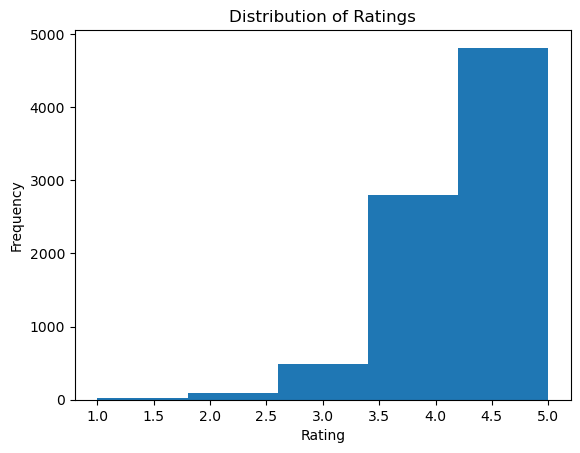

In [31]:
import matplotlib.pyplot as plt

plt.hist(data['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


Bar Plot: Create a bar plot to display the count of reviews for each brand.

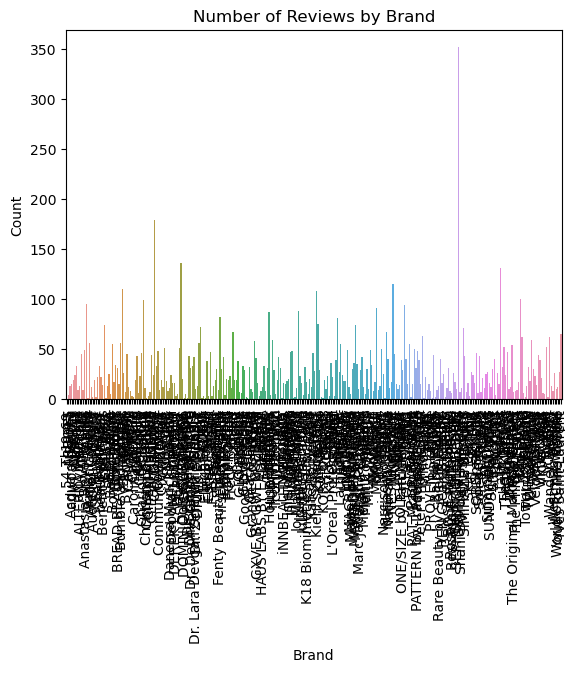

In [32]:
import seaborn as sns

sns.countplot(x='brand_name', data=data)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of Reviews by Brand')
plt.xticks(rotation=90)
plt.show()


Plot a bar chart to visualize the distribution of products by brand:

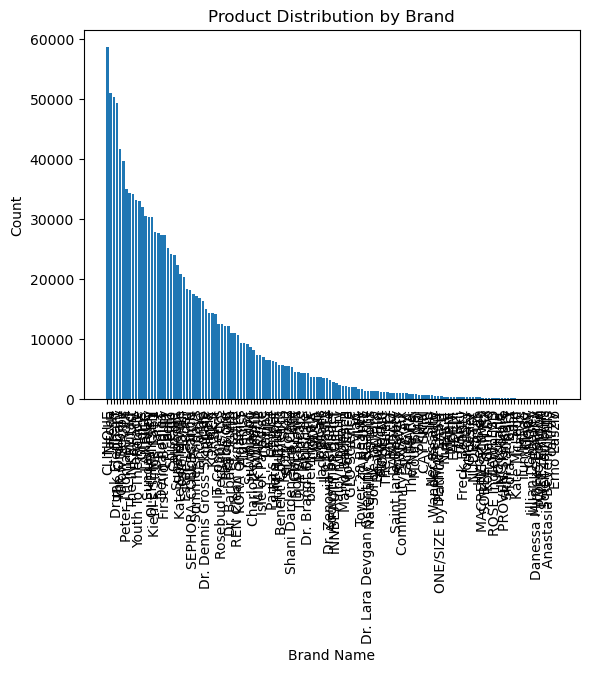

In [33]:
import matplotlib.pyplot as plt

brand_counts = text_edited['brand_name'].value_counts()
plt.bar(brand_counts.index, brand_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.title('Product Distribution by Brand')
plt.show()


Visualize the distribution of ratings using a box plot:


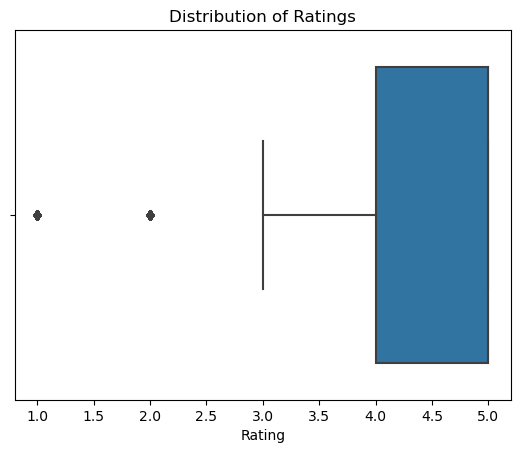

In [34]:
import seaborn as sns

sns.boxplot(x='rating', data=text_edited)
plt.xlabel('Rating')
plt.title('Distribution of Ratings')
plt.show()


Check the correlation between 'rating' and 'price_usd':

In [35]:
correlation = text_edited['rating'].corr(text_edited['price_usd'])
print(f"Correlation between rating and price_usd: {correlation}")


Correlation between rating and price_usd: 0.008259139077408781


Explore the distribution of review lengths:

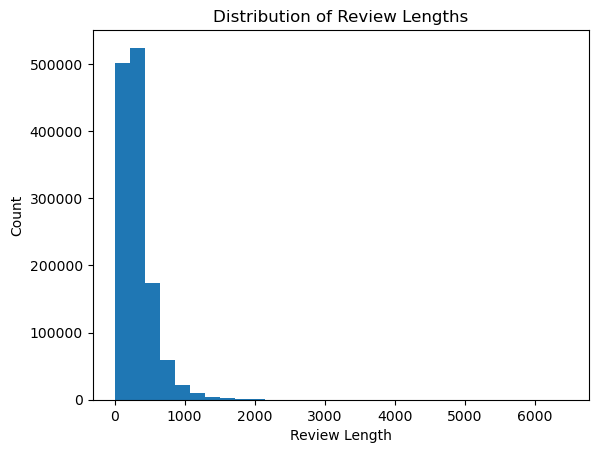

In [36]:
text_edited['review_length'] = text_edited['review_text'].str.len()

plt.hist(text_edited['review_length'], bins=30)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths')
plt.show()


Explore the relationship between price and rating using a scatter plot:

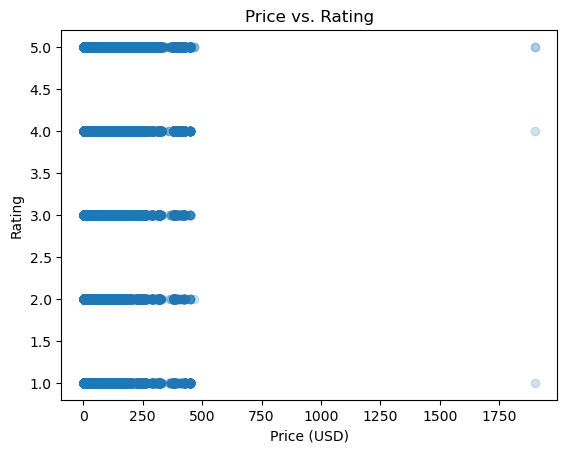

In [37]:

plt.scatter(text_edited['price_usd'], text_edited['rating'], alpha=0.2)
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.title('Price vs. Rating')
plt.show()


In [38]:
text_edited['rating'].describe()


count    1.301136e+06
mean     4.293047e+00
std      1.150064e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Frequency Distribution: Calculate the frequency of each category in the categorical columns to understand the distribution of values.

Bar Plots: Visualize the frequency distributions using bar plots, which can provide a clear view of the most common categories.

Unique Values: Check the number of unique values in each categorical column to understand the cardinality of the data.

Frequency Distribution for author_id:
1696370280     346
1288462295     242
1930716686     194
7375781965     186
2330399812     186
              ... 
1950796133       1
2184693760       1
1003776822       1
5965840460       1
11519076605      1
Name: author_id, Length: 503216, dtype: int64

Frequency Distribution for review_title:
Love it!                           7290
Love it                            6628
Amazing                            6512
Amazing!                           4990
Great product                      4618
                                   ... 
Wanted to love it but                 1
Skin texture changed only.            1
Wish I found this earlier!            1
Good for moisturizing.                1
Finally, a non-drying solution!       1
Name: review_title, Length: 364105, dtype: int64

Frequency Distribution for product_id:
P420652    16138
P7880       8736
P218700     7763
P248407     7547
P269122     7414
           ...  
P501153        1
P504424        1


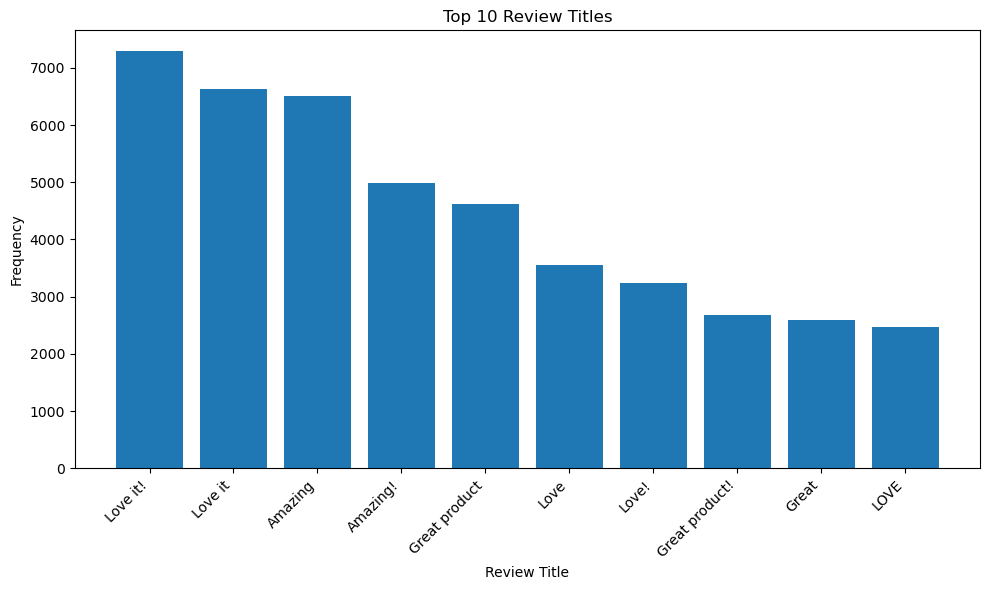

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset into a DataFrame named 'df'

# Categorical columns for EDA
categorical_columns = ['author_id', 'review_title', 'product_id', 'product_name', 'brand_name']

# Frequency distribution for each categorical column
for column in categorical_columns:
    print(f"Frequency Distribution for {column}:")
    print(text_edited[column].value_counts())
    print()

# Number of unique values in each categorical column
print("Number of unique values in each categorical column:")
for column in categorical_columns:
    print(f"{column}: {text_edited[column].nunique()}")

# Bar plots for top 10 categories in 'review_title' column
top_review_titles = text_edited['review_title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_review_titles.index, top_review_titles.values)
plt.xlabel('Review Title')
plt.ylabel('Frequency')
plt.title('Top 10 Review Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In this code, we first define the categorical columns we want to analyze in the categorical_columns list. We then calculate and print the frequency distribution for each categorical column using the value_counts() method. Additionally, we show the number of unique values in each categorical column using the nunique() method.

For the 'review_title' column, we create a bar plot to visualize the top 10 most common review titles.

